# Imports

- **Replace Null Values in Age column**

### 4- Handle Outliers

- **Check for Outliers**

In [6]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [7]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.drop(['PassengerId','Name', 'Ticket'], axis = 1, inplace= True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


## Chk datatype

In [9]:
dtypes = df.dtypes
n_uniq = df.nunique()
pd.DataFrame({"Dtype":dtypes, "Num_Uniqe":n_uniq}).T

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Dtype,int64,int64,object,float64,int64,int64,float64,object,object
Num_Uniqe,2,3,2,88,7,7,248,147,3


In [10]:
def chk_types(data):
    dtypes = df.dtypes
    n_uniq = df.nunique()
    
    return pd.DataFrame({"Dtype":dtypes, "Num_Uniqe":n_uniq}).T

In [11]:
def chk_types_table(data):
    return pd.DataFrame({
        "Dtype": data.dtypes,
        "Num_Unique": data.nunique()
    }).T


In [12]:
chk_types_table(df)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Dtype,int64,int64,object,float64,int64,int64,float64,object,object
Num_Unique,2,3,2,88,7,7,248,147,3


In [13]:
cols = ['Pclass',
        'Survived',
        'Sex',
        'SibSp',
        'Parch',
        'Embarked']
df[cols] = df[cols].astype('category')


In [14]:
chk_types(df)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Dtype,category,category,category,float64,category,category,float64,object,category
Num_Uniqe,2,3,2,88,7,7,248,147,3


In [15]:
df.shape[0]

891

In [16]:
null = df.isnull().sum()
ratio = (null/ df.shape[0])*100
pd.DataFrame({"Null":null, "ratio % ":ratio}).T

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Null,0.0,0.0,0.0,177.00000,0.0,0.0,0.0,687.000000,2.000000
ratio %,0.0,0.0,0.0,19.86532,0.0,0.0,0.0,77.104377,0.224467


In [17]:
median_1 = df['Age'].median()
df['Age'].fillna(median_1, inplace=True)


In [18]:
df.dropna(subset=['Embarked'], inplace= True)
df = df.drop("Cabin", axis=1)

In [19]:
null = df.isnull().sum()
ratio = (null/ df.shape[0])*100
pd.DataFrame({"Null":null, "ratio % ":ratio}).T

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ratio %,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


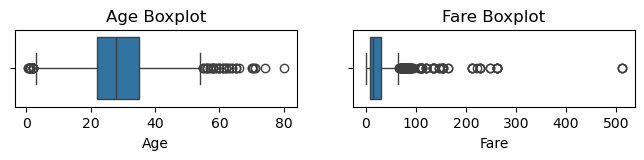

In [20]:
num_cols = df.select_dtypes('number').columns
plt.figure(figsize=(8,1))
for i , col in enumerate(num_cols):
    plt.subplot(1,2, i+1)
    sns.boxplot(df[col], orient="h")
    plt.title(f"{col} Boxplot")

In [21]:
def outliers_change(num_cols):
    for col in num_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_fence = Q1 -  1.5*IQR
        upper_fence = Q3 +  1.5*IQR
        # print(lower_fence)
        lower_outliers = df[df[col]< lower_fence][col].values
        upper_outliers = df[df[col]> upper_fence][col].values
        
        df[col].replace(lower_outliers, lower_fence, inplace=True)
        df[col].replace(upper_outliers, upper_fence, inplace=True)

    # upper_outliers = 
    


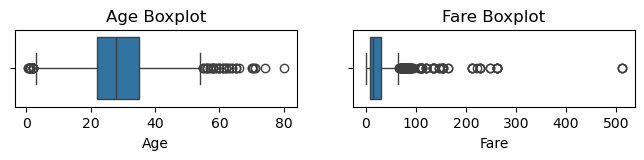

In [22]:
num_cols = df.select_dtypes('number').columns
plt.figure(figsize=(8,1))
for i , col in enumerate(num_cols):
    plt.subplot(1,2, i+1)
    sns.boxplot(df[col], orient="h")
    plt.title(f"{col} Boxplot")

In [23]:
df.duplicated().sum()

np.int64(116)

In [24]:
df.drop_duplicates(inplace=True)

In [25]:
df.duplicated().sum()

np.int64(0)

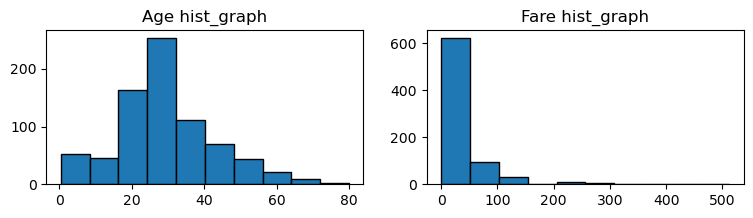

In [26]:
plt.figure(figsize=(9,2))
for i , col in enumerate(num_cols):
    plt.subplot(1, 2, i + 1 )
    plt.hist(df[col], edgecolor = 'black')
    plt.title(f"{col} hist_graph")
plt.show()

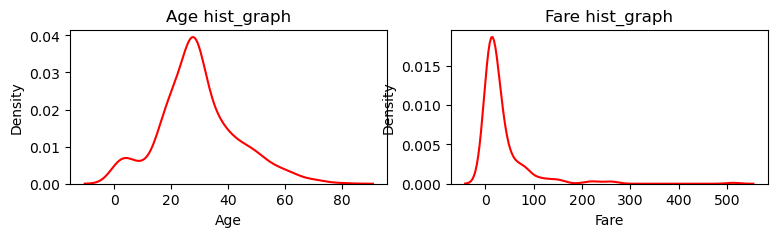

In [29]:
plt.figure(figsize=(9,2))
for i, col in enumerate(num_cols):
    plt.subplot(1, 2, i + 1)
    sns.kdeplot(df[col], color='red')   
    plt.title(f"{col} hist_graph")
plt.show()

In [34]:
cat_cols=df.select_dtypes('category').columns
cat_cols

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'], dtype='object')

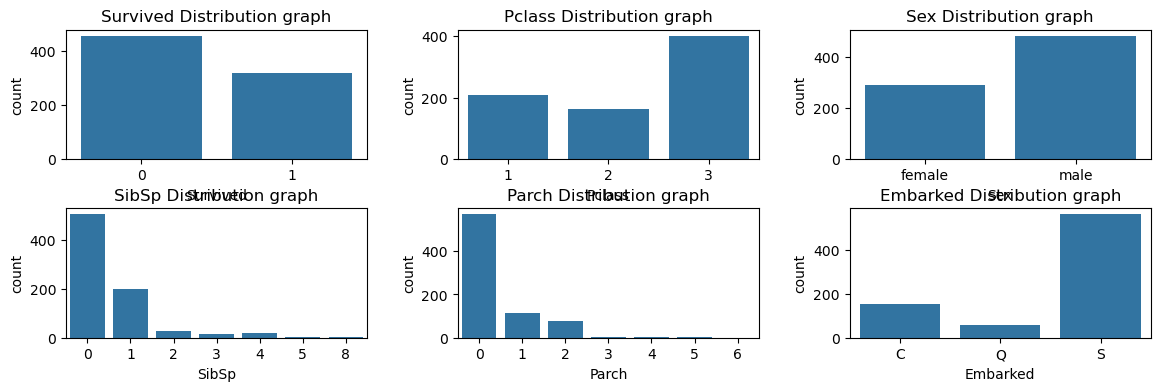

In [35]:
plt.figure(figsize=(14,4))
for i , col in enumerate(cat_cols):
    plt.subplot(2, 3, i + 1)
    sns.countplot(x=col,data=df)   
    plt.title(f"{col} Distribution graph")
plt.subplots_adjust(hspace=0.38 , wspace=0.3)    
plt.show()

In [ ]:
# unique=df['Survived'].value_counts()
# count=unique.values
# categories=unique.index

CategoricalIndex([0, 1], categories=[0, 1], ordered=False, dtype='category', name='Survived')

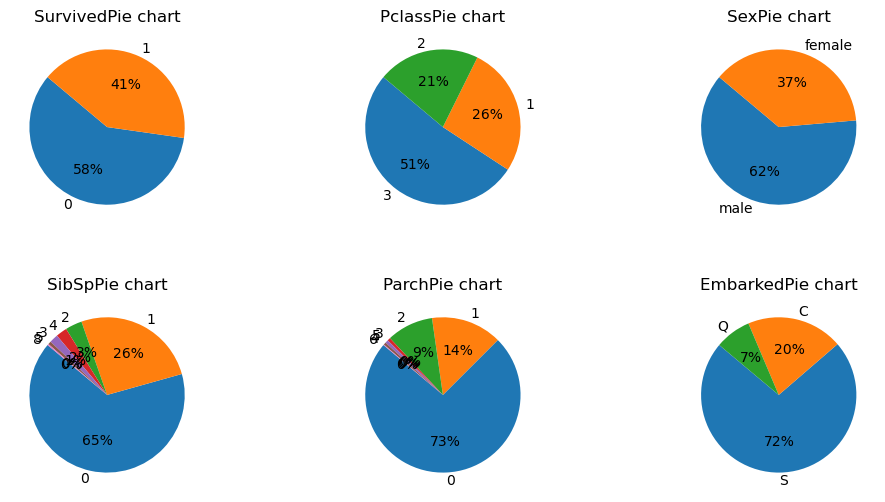

In [47]:
plt.figure(figsize=(12,6))
for i ,col in enumerate(cat_cols):
    plt.subplot(2,3,i+1)
    unique=df[col].value_counts()
    count=unique.values
    categories=unique.index
    plt.pie(count,labels=categories,startangle=140,autopct='%1.1d%%')
    plt.title(f"{col}Pie chart")
plt.subplots_adjust(hspace=0.38 , wspace=0.3)    
plt.show()  

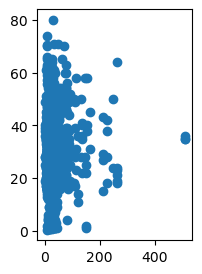

In [52]:
plt.figure(figsize=(2,3))
plt.scatter(df['Fare'],df['Age'])

In [ ]:
# correlation matix
corr=df[['Age','Fare']].corr()
corr

,Age,Fare
Age,1.000000,0.089624
Fare,0.089624,1.000000


In [ ]:
# pivot
# +جزء شرح